# ECS7026P Neural Networks and Deep Learning - 2022/23 : Coursework 1


    Name: Mohammed Ataaur Rahaman
    Student Number: 220843052
    email: m.a.rahaman@se22.qmul.ac.uk
    Assignment Number: Coursework 1
    Module Code: ECS6P9U/P/7026P
    Module Name: Neural Networks and Deep Learning 

Imports 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import torch
import torchvision
import torchvision.transforms as transforms

from torch import nn
from tqdm.auto import tqdm

## Data Gathering

In [3]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
# transform = transforms.Compose([transforms.ToTensor()])

# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

In [5]:
# trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True)
# testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True)

In [6]:
testset, trainset

(Dataset CIFAR10
     Number of datapoints: 10000
     Root location: ./data
     Split: Test
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ),
 Dataset CIFAR10
     Number of datapoints: 50000
     Root location: ./data
     Split: Train
     StandardTransform
 Transform: Compose(
                ToTensor()
                Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
            ))

## Data Preprocessing

In [11]:
BATCH_SIZE = 8
CLASSES = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)

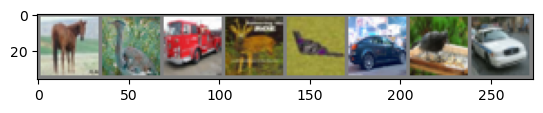

horse bird  truck deer  plane car   bird  car  


In [12]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{CLASSES[labels[j]]:5s}' for j in range(BATCH_SIZE)))


## Model

In [8]:
# class LeNet(torch.nn.Module):
#     def __init__(self, num_inputs, num_outputs):
#         super(LeNet, self).__init__()
#         self.num_inputs = num_inputs
#         self.num_outputs = num_outputs
#         C1 = 6
#         C2 = 16
#         L1 = 400
#         L2 = 120
#         L3 = 84
#         self.Convl1 = nn.Conv2d(num_inputs, C1, kernel_size = 5, padding = 2)
#         self.Sigmoid = nn.Sigmoid()
#         self.Avg1 = nn.AvgPool2d(2, stride=2, padding=0)
#         self.Convl2 = nn.Conv2d(C1,C2,kernel_size = 5)
#         self.Avg2 = nn.AvgPool2d(2, stride=2, padding=0)
#         self.Fltn = nn.Flatten()
#         self.Linear1 = nn.Linear(L1, L2)
#         self.Linear2 = nn.Linear(L2, L3)
#         self.Linear3 = nn.Linear(L3, num_outputs)
#     def forward(self, x):
#         out = self.Convl1(x)
#         out = self.Sigmoid(out)
#         out = self.Avg1(out)
#         out = self.Convl2(out)
#         out = self.Sigmoid(out)
#         out = self.Avg2(out)
#         #out = self.Sigmoid(out)
#         out = self.Fltn(out)
#         out = self.Linear1(out)
#         out = self.Sigmoid(out)
#         out = self.Linear2(out)
#         out = self.Sigmoid(out)
#         out = self.Linear3(out)
#         # out = self.Sigmoid(out)
#         return out

In [13]:
K = 5
N = 2
IMG_DIM = 32
IMG_CHANNELS = 3
HIDDEN_CHANNELS = 16
HIDDEN_CONV_KERNEL = 5
STRIDE = 1

# sap = nn.AvgPool2d(kernel_size=IMG_DIM)
# linear = nn.Linear(in_features=IMG_CHANNELS, out_features=K, bias=True)

# sigmoid = nn.Sigmoid()

In [14]:
# conv2d = nn.Conv2d(in_channels=IMG_CHANNELS, out_channels=HIDDEN_CHANNELS, kernel_size=HIDDEN_CONV_KERNEL)
# conv2d

In [17]:
class Backbone(nn.Module):

  def __init__(self, img_size=IMG_DIM, in_channels=IMG_CHANNELS, out_channels=HIDDEN_CHANNELS, kernel_size=HIDDEN_CONV_KERNEL, k=K, debug=False):
    super(Backbone, self).__init__()

    # Boolean to print debug logs.
    self.debug = debug

    self.spaitial_average_pool = nn.AvgPool2d(kernel_size=img_size)
    self.linear = nn.Linear(in_features=in_channels, out_features=k, bias=True)
    self.non_linear = nn.Sigmoid()       # Non Linear Activation
    # self.non_linear = nn.ReLU()

    self.conv2ds = nn.ModuleList([
        nn.Sequential(
            nn.Conv2d(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size), 
            # nn.ReLU()
        ) for _ in range(k)
      ])

  def forward(self, x):
    sap_out = self.spaitial_average_pool(x).reshape(x.shape[0], -1)
    if self.debug: print(f"{sap_out.shape=}")

    lin_out = self.linear(sap_out)
    if self.debug: print(f"{lin_out.shape=}")

    g_out = self.non_linear(lin_out)
    if self.debug: print(f"{g_out.shape=}")
    if self.debug: print(f"{g_out=}")

    outs = list()
    for a, conv2d in zip(g_out.transpose(0, 1), self.conv2ds):
      c_out = conv2d(x)
      if self.debug: print(f"{c_out.shape=}")
      if self.debug: print(f"{a.shape=}, \n{a=}")

      out = a.reshape(x.shape[0], 1, 1, 1)*c_out
      if self.debug: print(f"{out.shape=}")
      outs.append(out)
      
    out = sum(outs)
    if self.debug: print(f"{out.shape=}")

    return out

  def set_device_to(self, device='cuda'):
    if 'cuda' == device and not torch.cuda.is_available():
      print(f"Cuda not available")
      return

    self.spaitial_average_pool.to(device)
    self.linear.to(device)
    self.non_linear.to(device)

    for conv2d in self.conv2ds:
      conv2d.to(device)

In [16]:
# n = 5
# channels = [IMG_CHANNELS] + [HIDDEN_CHANNELS]*(n-1)

# [IMG_DIM + (STRIDE-HIDDEN_CONV_KERNEL)*i for i in range(n)]

In [13]:
# channels

In [18]:
class Model(nn.Module):

  def __init__(self, channels, Ks, kernel_size=HIDDEN_CONV_KERNEL, k=K, n=N, debug=False):
    super(Model, self).__init__()

    # Boolean to print debug logs.
    self.debug = debug
    self.Ks = Ks
    self.channels = channels
    self.img_sizes = [IMG_DIM + (STRIDE-kernel_size)*i for i in range(n+1)]

    if self.debug: print(f"{self.channels=}")
    if self.debug: print(f"{self.img_sizes=}")
    # if self.debug: print(f"{k=}")
    if self.debug: print(f"{self.Ks=}")
    if self.debug: print(f"{n=}")

    self.backbones = nn.ModuleList([Backbone(img_size=self.img_sizes[i], in_channels=self.channels[i], out_channels=self.channels[i+1], kernel_size=kernel_size, k=self.Ks[i], debug=debug) for i in range(n)])

    self.spaitial_average_pool = nn.AvgPool2d(kernel_size=self.img_sizes[-1])
    self.linear = nn.Linear(in_features=self.channels[-1], out_features=len(CLASSES), bias=False)

  def set_debug(self, debug=True):
    self.debug = debug
    for backbone in self.backbones:
      backbone.debug = debug

  def forward(self, x):
    for backbone in self.backbones:
      x = backbone(x)
    
    f = self.spaitial_average_pool(x).reshape(x.shape[0], -1)
    if self.debug: print(f"M: {f.shape=}")

    out = self.linear(f)
    if self.debug: print(f"M: {out.shape=}")

    return out

  def set_device_to(self, device='cuda'):
    if 'cuda' == device and not torch.cuda.is_available():
      print(f"Cuda not available")
      return

    self.spaitial_average_pool.to(device)
    self.linear.to(device)
    for backbone in self.backbones:
      backbone.set_device_to(device)
      print(f"M: backbone.set_device_to(device) Device = {device}")

In [19]:
class Trainer:

  def __init__(self, model, criterion, optimizer, epochs, trainloader, testloader, log_step=100) -> None:
    self.model = model
    self.criterion = criterion
    self.optimizer = optimizer
    
    self.epochs = epochs
    self.log_step = log_step

    self.trainloader = trainloader
    self.testloader = testloader

    self.losses = list()
    self.val_losses = list()
    self.batch_losses = list()

  def train(self):

    for epoch in range(self.epochs):  # loop over the dataset multiple times

        batch_losses = list()
        running_loss = 0.0
        for i, data in tqdm(enumerate(self.trainloader, 0), total=len(trainloader)):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            if USE_GPU:
              inputs = inputs.to('cuda')
              labels = labels.to('cuda')
            
            # zero the parameter gradients
            self.optimizer.zero_grad()

            # forward + backward + optimize
            outputs = self.model(inputs)
            loss = self.criterion(outputs, labels)
            loss.backward()
            self.optimizer.step()

            # print statistics
            batch_losses.append(loss.item())
            running_loss += loss.item()
            if i % self.log_step == self.log_step-1:    # print every 2000 mini-batches
                avg_loss = running_loss / self.log_step
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {avg_loss:.3f}')
                running_loss = 0.0
                self.batch_losses.append(avg_loss)

        self.losses.append(sum(batch_losses) / len(batch_losses))

        print(f"Train Loss : {self.losses[-1]}")
        self.eval()

    print('Finished Training')

  def eval(self):
    correct = 0
    total = 0
    losses = list()
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in self.testloader:
            images, labels = data
            if USE_GPU:
              images = images.to('cuda')
              labels = labels.to('cuda')

            # calculate outputs by running images through the network
            outputs = self.model(images)

            loss = self.criterion(outputs, labels)
            losses.append(loss.item())

            # the class with the highest energy is what we choose as prediction
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            
    val_loss = sum(losses) / len(losses)
    self.val_losses.append(val_loss)

    print(f"Val Loss : {val_loss}")
    print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')
    
  def plot(self):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(self.losses)
    ax1.plot(self.val_lossess)
    ax2.plot(self.batch_losses)
    fig.show()


In [20]:
# Init model

IMG_DIM = 32
IMG_CHANNELS = 3


K = 5
# HIDDEN_CHANNELS = 16
HIDDEN_CONV_KERNEL = 5
STRIDE = 1

channels = [IMG_CHANNELS, 16, 32, 64, 128] #20, 25, 30]
Ks = [5, 5, 5, 5, 5, 5, 5, 5]
N = len(channels) - 1

model = Model(
    Ks=Ks,
    channels=channels,
    kernel_size=HIDDEN_CONV_KERNEL, 
    k=K, 
    n=N, 
    debug=True
)
model

self.channels=[3, 16, 32, 64, 128]
self.img_sizes=[32, 28, 24, 20, 16]
self.Ks=[5, 5, 5, 5, 5, 5, 5, 5]
n=4


Model(
  (backbones): ModuleList(
    (0): Backbone(
      (spaitial_average_pool): AvgPool2d(kernel_size=32, stride=32, padding=0)
      (linear): Linear(in_features=3, out_features=5, bias=True)
      (non_linear): Sigmoid()
      (conv2ds): ModuleList(
        (0): Sequential(
          (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
        )
        (1): Sequential(
          (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
        )
        (2): Sequential(
          (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
        )
        (3): Sequential(
          (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
        )
        (4): Sequential(
          (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
        )
      )
    )
    (1): Backbone(
      (spaitial_average_pool): AvgPool2d(kernel_size=28, stride=28, padding=0)
      (linear): Linear(in_features=16, out_features=5, bias=True)
      (non_linear): Sigmoid()
      (conv2ds): ModuleList(
        (0):

In [21]:
model.backbones[0].conv2ds

ModuleList(
  (0): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (2): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (3): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  )
  (4): Sequential(
    (0): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1))
  )
)

In [27]:
# def init_weights(m):
#     if type(m) == nn.Linear or type(m) == nn.Conv2d: # by checking the type we can init different layers in different ways
#         torch.nn.init.xavier_uniform_(m.weight)          

# num_outputs = 10
# #model = LeNet(num_outputs)
# model.apply(init_weights);
# print(model)

In [22]:
# Init optimizer 

LR = 0.001 #1e-2
MOMENTUM = 0.9 #0.9
USE_GPU = True


criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=LR, momentum=MOMENTUM)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

model.set_debug(False)
if USE_GPU: model.set_device_to('cuda')

M: backbone.set_device_to(device) Device = cuda
M: backbone.set_device_to(device) Device = cuda
M: backbone.set_device_to(device) Device = cuda
M: backbone.set_device_to(device) Device = cuda


In [23]:
# Init Trainer

EPOCHS = 3
BATCH_SIZE = 64

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=0)


trainer = Trainer(
    model=model, 
    criterion=criterion, 
    optimizer=optimizer, 
    epochs=EPOCHS, 
    log_step=200,
    trainloader=trainloader,
    testloader=testloader,
)

In [24]:
trainer.epochs = 20

trainer.train()
print(f"{trainer.losses[-1]=}")
trainer.plot()
trainer.eval()

  0%|          | 0/782 [00:00<?, ?it/s]

[1,   200] loss: 2.087
[1,   400] loss: 1.993
[1,   600] loss: 1.969
Train Loss : 1.9936605135498144
Val Loss : 1.8620241667814315
Accuracy of the network on the 10000 test images: 33 %


  0%|          | 0/782 [00:00<?, ?it/s]

[2,   200] loss: 1.879
[2,   400] loss: 1.875
[2,   600] loss: 1.833
Train Loss : 1.8474539173838427
Val Loss : 1.8379873743482456
Accuracy of the network on the 10000 test images: 35 %


  0%|          | 0/782 [00:00<?, ?it/s]

[3,   200] loss: 1.783
[3,   400] loss: 1.761
[3,   600] loss: 1.754
Train Loss : 1.7587467320739765
Val Loss : 1.7024826684575172
Accuracy of the network on the 10000 test images: 38 %


  0%|          | 0/782 [00:00<?, ?it/s]

[4,   200] loss: 1.734
[4,   400] loss: 1.723
[4,   600] loss: 1.683
Train Loss : 1.7062547706886935
Val Loss : 1.6720666832225337
Accuracy of the network on the 10000 test images: 39 %


  0%|          | 0/782 [00:00<?, ?it/s]

[5,   200] loss: 1.661
[5,   400] loss: 1.673
[5,   600] loss: 1.642
Train Loss : 1.656737303185036
Val Loss : 1.659948309515692
Accuracy of the network on the 10000 test images: 41 %


  0%|          | 0/782 [00:00<?, ?it/s]

[6,   200] loss: 1.623
[6,   400] loss: 1.651
[6,   600] loss: 1.611
Train Loss : 1.627477153640269
Val Loss : 1.6082184375471371
Accuracy of the network on the 10000 test images: 43 %


  0%|          | 0/782 [00:00<?, ?it/s]

[7,   200] loss: 1.587
[7,   400] loss: 1.602
[7,   600] loss: 1.601
Train Loss : 1.60095584727919
Val Loss : 1.6300064811281338
Accuracy of the network on the 10000 test images: 42 %


  0%|          | 0/782 [00:00<?, ?it/s]

[8,   200] loss: 1.584
[8,   400] loss: 1.576
[8,   600] loss: 1.577
Train Loss : 1.5821343654256952
Val Loss : 1.5687384187795554
Accuracy of the network on the 10000 test images: 44 %


  0%|          | 0/782 [00:00<?, ?it/s]

[9,   200] loss: 1.558
[9,   400] loss: 1.577
[9,   600] loss: 1.559
Train Loss : 1.5612633057567469
Val Loss : 1.5537007424482114
Accuracy of the network on the 10000 test images: 45 %


  0%|          | 0/782 [00:00<?, ?it/s]

[10,   200] loss: 1.550
[10,   400] loss: 1.550
[10,   600] loss: 1.540
Train Loss : 1.5448938910003818
Val Loss : 1.5547053927828551
Accuracy of the network on the 10000 test images: 45 %


  0%|          | 0/782 [00:00<?, ?it/s]

[11,   200] loss: 1.528
[11,   400] loss: 1.546
[11,   600] loss: 1.536
Train Loss : 1.5350224755304245
Val Loss : 1.5666506077833235
Accuracy of the network on the 10000 test images: 45 %


  0%|          | 0/782 [00:00<?, ?it/s]

[12,   200] loss: 1.501
[12,   400] loss: 1.524
[12,   600] loss: 1.527
Train Loss : 1.5169451270261993
Val Loss : 1.5380504678009421
Accuracy of the network on the 10000 test images: 46 %


  0%|          | 0/782 [00:00<?, ?it/s]

[13,   200] loss: 1.494
[13,   400] loss: 1.508
[13,   600] loss: 1.515
Train Loss : 1.505921512613516
Val Loss : 1.5405444962203882
Accuracy of the network on the 10000 test images: 45 %


  0%|          | 0/782 [00:00<?, ?it/s]

[14,   200] loss: 1.490
[14,   400] loss: 1.512
[14,   600] loss: 1.485
Train Loss : 1.4990515801912683
Val Loss : 1.509438255030638
Accuracy of the network on the 10000 test images: 47 %


  0%|          | 0/782 [00:00<?, ?it/s]

[15,   200] loss: 1.471
[15,   400] loss: 1.489
[15,   600] loss: 1.479
Train Loss : 1.4831827223453375
Val Loss : 1.5138620973392656
Accuracy of the network on the 10000 test images: 47 %


  0%|          | 0/782 [00:00<?, ?it/s]

[16,   200] loss: 1.468
[16,   400] loss: 1.473
[16,   600] loss: 1.482
Train Loss : 1.4771592155137026
Val Loss : 1.5102797473312184
Accuracy of the network on the 10000 test images: 46 %


  0%|          | 0/782 [00:00<?, ?it/s]

[17,   200] loss: 1.459
[17,   400] loss: 1.466
[17,   600] loss: 1.472
Train Loss : 1.4684324278246106
Val Loss : 1.4912545734150395
Accuracy of the network on the 10000 test images: 47 %


  0%|          | 0/782 [00:00<?, ?it/s]

[18,   200] loss: 1.466
[18,   400] loss: 1.454
[18,   600] loss: 1.457
Train Loss : 1.458828845292406
Val Loss : 1.504427007808807
Accuracy of the network on the 10000 test images: 46 %


  0%|          | 0/782 [00:00<?, ?it/s]

[19,   200] loss: 1.448
[19,   400] loss: 1.467
[19,   600] loss: 1.444
Train Loss : 1.4565288654678619
Val Loss : 1.4895113197861203
Accuracy of the network on the 10000 test images: 47 %


  0%|          | 0/782 [00:00<?, ?it/s]

[20,   200] loss: 1.437
[20,   400] loss: 1.442
[20,   600] loss: 1.457
Train Loss : 1.4471408783474846
Val Loss : 1.4825980230501503
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[21,   200] loss: 1.437
[21,   400] loss: 1.425
[21,   600] loss: 1.441
Train Loss : 1.4345289448947858
Val Loss : 1.4984530142158459
Accuracy of the network on the 10000 test images: 47 %


  0%|          | 0/782 [00:00<?, ?it/s]

[22,   200] loss: 1.423
[22,   400] loss: 1.434
[22,   600] loss: 1.419
Train Loss : 1.4271170429866333
Val Loss : 1.4790874142555674
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[23,   200] loss: 1.427
[23,   400] loss: 1.422
[23,   600] loss: 1.418
Train Loss : 1.4218913399045119
Val Loss : 1.4735986449915892
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[24,   200] loss: 1.417
[24,   400] loss: 1.421
[24,   600] loss: 1.419
Train Loss : 1.415907730684256
Val Loss : 1.4791031354551862
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[25,   200] loss: 1.409
[25,   400] loss: 1.406
[25,   600] loss: 1.409
Train Loss : 1.4162167124736034
Val Loss : 1.4751876007979083
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[26,   200] loss: 1.398
[26,   400] loss: 1.407
[26,   600] loss: 1.405
Train Loss : 1.4025997495864664
Val Loss : 1.4872462908933117
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[27,   200] loss: 1.396
[27,   400] loss: 1.389
[27,   600] loss: 1.400
Train Loss : 1.3950440847050503
Val Loss : 1.4549676886030063
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[28,   200] loss: 1.390
[28,   400] loss: 1.385
[28,   600] loss: 1.407
Train Loss : 1.3920173471236168
Val Loss : 1.4891785945102667
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[29,   200] loss: 1.367
[29,   400] loss: 1.391
[29,   600] loss: 1.384
Train Loss : 1.385304977521872
Val Loss : 1.480648000528858
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[30,   200] loss: 1.343
[30,   400] loss: 1.377
[30,   600] loss: 1.396
Train Loss : 1.3765183976849023
Val Loss : 1.4741469727959602
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[31,   200] loss: 1.358
[31,   400] loss: 1.386
[31,   600] loss: 1.378
Train Loss : 1.3767641614312711
Val Loss : 1.5001073696051435
Accuracy of the network on the 10000 test images: 48 %


  0%|          | 0/782 [00:00<?, ?it/s]

[32,   200] loss: 1.376
[32,   400] loss: 1.371
[32,   600] loss: 1.363
Train Loss : 1.3725075842169545
Val Loss : 1.4650043811008429
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[33,   200] loss: 1.353
[33,   400] loss: 1.368
[33,   600] loss: 1.363
Train Loss : 1.3649311780624682
Val Loss : 1.4599117055820052
Accuracy of the network on the 10000 test images: 50 %


  0%|          | 0/782 [00:00<?, ?it/s]

[34,   200] loss: 1.336
[34,   400] loss: 1.357
[34,   600] loss: 1.380
Train Loss : 1.361791605839644
Val Loss : 1.4694248445474418
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[35,   200] loss: 1.342
[35,   400] loss: 1.358
[35,   600] loss: 1.358
Train Loss : 1.3537238805800142
Val Loss : 1.4656896393769865
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[36,   200] loss: 1.327
[36,   400] loss: 1.344
[36,   600] loss: 1.364
Train Loss : 1.3481120164589504
Val Loss : 1.4677139308042586
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[37,   200] loss: 1.328
[37,   400] loss: 1.335
[37,   600] loss: 1.342
Train Loss : 1.342357721856183
Val Loss : 1.4577315559812412
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[38,   200] loss: 1.328
[38,   400] loss: 1.332
[38,   600] loss: 1.350
Train Loss : 1.3391272962245795
Val Loss : 1.4762008121818493
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[39,   200] loss: 1.349
[39,   400] loss: 1.328
[39,   600] loss: 1.341
Train Loss : 1.3360902669332217
Val Loss : 1.4791370599892488
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[40,   200] loss: 1.322
[40,   400] loss: 1.335
[40,   600] loss: 1.333
Train Loss : 1.3303687763031182
Val Loss : 1.490336190363404
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[41,   200] loss: 1.328
[41,   400] loss: 1.324
[41,   600] loss: 1.323
Train Loss : 1.3325087747457998
Val Loss : 1.4686777234836748
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

[42,   200] loss: 1.313
[42,   400] loss: 1.316
[42,   600] loss: 1.325
Train Loss : 1.320494764982282
Val Loss : 1.4705400330245875
Accuracy of the network on the 10000 test images: 50 %


  0%|          | 0/782 [00:00<?, ?it/s]

[43,   200] loss: 1.300
[43,   400] loss: 1.333
[43,   600] loss: 1.314
Train Loss : 1.315475340313314
Val Loss : 1.4857576683068732
Accuracy of the network on the 10000 test images: 49 %


  0%|          | 0/782 [00:00<?, ?it/s]

KeyboardInterrupt: 

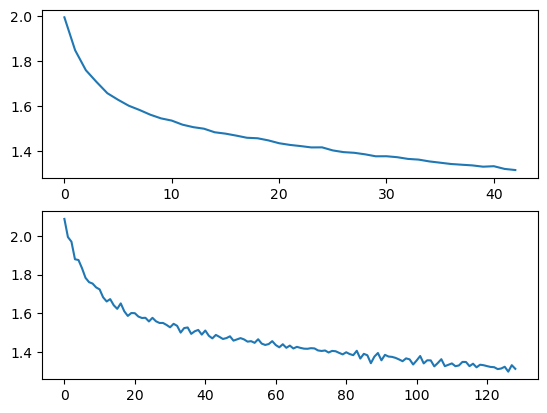

In [25]:
trainer.plot()

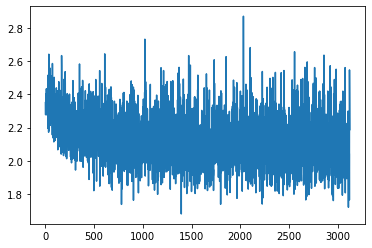

In [103]:
trainer.plot()

In [63]:
log_step = 100

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in tqdm(enumerate(trainloader, 0), total=len(trainloader)):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        if USE_GPU:
          inputs = inputs.to('cuda')
          labels = labels.to('cuda')
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % log_step == log_step-1:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / log_step:.3f}')
            running_loss = 0.0

print('Finished Training')

  0%|          | 0/12500 [00:00<?, ?it/s]

[1,   100] loss: 2.768
[1,   200] loss: 3.014
[1,   300] loss: 2.915
[1,   400] loss: 2.666
[1,   500] loss: 2.793
[1,   600] loss: 2.831
[1,   700] loss: 2.637
[1,   800] loss: 2.641
[1,   900] loss: 2.888
[1,  1000] loss: 2.831
[1,  1100] loss: 2.605
[1,  1200] loss: 2.653
[1,  1300] loss: 2.747
[1,  1400] loss: 2.968
[1,  1500] loss: 2.802
[1,  1600] loss: 2.817
[1,  1700] loss: 2.950
[1,  1800] loss: 2.750
[1,  1900] loss: 2.765
[1,  2000] loss: 2.617
[1,  2100] loss: 2.651
[1,  2200] loss: 2.627
[1,  2300] loss: 2.623
[1,  2400] loss: 2.807
[1,  2500] loss: 2.796
[1,  2600] loss: 2.800
[1,  2700] loss: 2.717
[1,  2800] loss: 2.854
[1,  2900] loss: 2.668
[1,  3000] loss: 2.597
[1,  3100] loss: 2.653
[1,  3200] loss: 2.806
[1,  3300] loss: 2.590
[1,  3400] loss: 2.685
[1,  3500] loss: 2.804
[1,  3600] loss: 2.656
[1,  3700] loss: 2.742
[1,  3800] loss: 2.877
[1,  3900] loss: 2.763
[1,  4000] loss: 2.832
[1,  4100] loss: 2.846
[1,  4200] loss: 2.636
[1,  4300] loss: 2.935
[1,  4400] 

In [64]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if USE_GPU:
          images = images.to('cuda')
          labels = labels.to('cuda')

        # calculate outputs by running images through the network
        outputs = model(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')


Accuracy of the network on the 10000 test images: 22 %


In [230]:
for X, y in trainloader:
  out = model(X)
  break

sap_out.shape=torch.Size([4, 3])
lin_out.shape=torch.Size([4, 5])
g_out.shape=torch.Size([4, 5])
g_out=tensor([[0.5469, 0.4594, 0.6378, 0.6490, 0.3641],
        [0.5344, 0.4351, 0.6494, 0.6619, 0.3571],
        [0.5595, 0.4176, 0.6483, 0.6484, 0.3586],
        [0.5600, 0.4134, 0.6506, 0.6497, 0.3568]], grad_fn=<SigmoidBackward0>)
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.5469, 0.5344, 0.5595, 0.5600], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.4594, 0.4351, 0.4176, 0.4134], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.6378, 0.6494, 0.6483, 0.6506], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.6490, 0.6619, 0.6484, 0.6497], grad_fn=<UnbindBackward0>)
out.shape=

In [160]:
sap = nn.AvgPool2d(kernel_size=28)
linear = nn.Linear(in_features=16, out_features=10, bias=True)
linear

Linear(in_features=16, out_features=10, bias=True)

In [161]:
sap_out = sap(out).reshape(BATCH_SIZE, -1)
print(f"{sap_out.shape=}")

out = linear(sap_out)
print(f"{out.shape=}")

sap_out.shape=torch.Size([4, 16])
out.shape=torch.Size([4, 10])


In [154]:
out.shape

torch.Size([4, 16, 28, 28])

In [131]:
for X, y in trainloader:
  print(f"{X.shape=}")

  sap_out = sap(X).reshape(BATCH_SIZE, -1)
  print(f"{sap_out.shape=}")

  lin_out = linear(sap_out)
  print(f"{lin_out.shape=}")

  g_out = sigmoid(lin_out)
  print(f"{g_out.shape=}")
  print(f"{g_out=}")

  conv2ds = list()
  for i in range(K):
    conv2d = nn.Conv2d(in_channels=IMG_CHANNELS, out_channels=HIDDEN_CHANNELS, kernel_size=HIDDEN_CONV_KERNEL)
    conv2ds.append(conv2d)

  outs = list()
  for a, conv2d in zip(g_out.transpose(0, 1), conv2ds):
    c_out = conv2d(X)
    print(f"{c_out.shape=}")
    print(f"{a.shape=}, \n{a=}")

    out = a.reshape(4, 1, 1, 1)*c_out
    print(f"{out.shape=}")
    outs.append(out)
    
  out = sum(outs)
  print(f"{out.shape=}")
  break

X.shape=torch.Size([4, 3, 32, 32])
sap_out.shape=torch.Size([4, 3])
lin_out.shape=torch.Size([4, 5])
g_out.shape=torch.Size([4, 5])
g_out=tensor([[0.6158, 0.4734, 0.4574, 0.3917, 0.4462],
        [0.6017, 0.5205, 0.4572, 0.3841, 0.4627],
        [0.6050, 0.5056, 0.4546, 0.3865, 0.4573],
        [0.6161, 0.4672, 0.4287, 0.4068, 0.4293]], grad_fn=<SigmoidBackward0>)
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.6158, 0.6017, 0.6050, 0.6161], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.4734, 0.5205, 0.5056, 0.4672], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.4574, 0.4572, 0.4546, 0.4287], grad_fn=<UnbindBackward0>)
out.shape=torch.Size([4, 16, 28, 28])
c_out.shape=torch.Size([4, 16, 28, 28])
a.shape=torch.Size([4]), 
a=tensor([0.3917, 0.3841, 0.3865, 0.4068], gr

In [134]:
len(outs)

5

In [145]:
out[0][1][1][1]

tensor(-0.0531, grad_fn=<SelectBackward0>)

In [146]:
o = 0

for i in range(len(outs)):
  o += outs[i][0][1][1][1] 

o

tensor(-0.0531, grad_fn=<AddBackward0>)

In [111]:
(a.reshape(BATCH_SIZE, 1, 1, 1)*c_out).shape

torch.Size([4, 16, 28, 28])

In [127]:
(a.reshape(4, 1, 1, 1)*c_out)[1][1][10]

tensor([ 0.0285,  0.0197, -0.0103, -0.0060, -0.0005,  0.0115,  0.0123,  0.0011,
        -0.0217, -0.0369, -0.0204, -0.0083, -0.0108, -0.0173, -0.0185, -0.0025,
         0.0095, -0.0113, -0.0094,  0.0035, -0.0033, -0.0072, -0.0165, -0.0155,
         0.0048, -0.0135, -0.0214,  0.0189], grad_fn=<SelectBackward0>)

In [128]:
c_out[1][1][10]

tensor([ 0.0666,  0.0460, -0.0241, -0.0139, -0.0011,  0.0268,  0.0287,  0.0026,
        -0.0508, -0.0863, -0.0476, -0.0195, -0.0252, -0.0405, -0.0434, -0.0058,
         0.0222, -0.0264, -0.0221,  0.0083, -0.0077, -0.0168, -0.0387, -0.0362,
         0.0111, -0.0315, -0.0501,  0.0443], grad_fn=<SelectBackward0>)

In [130]:
0.4277*0.0666

0.028484820000000004